<a href="https://colab.research.google.com/github/KatieMears628/death-classification/blob/main/final_project_eda_km.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [147]:
# Read in the 2015_data
death_data = pd.read_csv('/2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_52324/597674786.py:2: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  death_data = pd.read_csv('/Users/clairebentzen/death-classification/2015_data.csv')


   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

In [148]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [149]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count      2.718198e+06             73043.000000             2.645155e+06   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean       1.226700e+00                12.602371             3.718700e+00   
std        4.993832e-01                 9.516661             1.985368e+00   
min        1.000000e+00                 0.000000             1.000000e+00   
25%        1.000000e+00                11.000000             3.000000e+00   
50%        1.000000e+00                12.000000             3.000000e+00   
75%        1.000000e+00                13.000000             5.000000e+00   
max        4.000000e+00                99.000000             9.000000e+00   

        education_reporting_flag  month_of_death      sex  detail_age_type 

In [150]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                     0
education_1989_revision       2645155
education_2003_revision         73043
education_reporting_flag            0
month_of_death                      0
                               ...   
race_imputation_flag          2692049
race_recode_3                       0
race_recode_5                       0
hispanic_origin                     0
hispanic_originrace_recode          0
Length: 77, dtype: int64


In [151]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       97.312815
education_2003_revision        2.687185
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.038002
race_recode_3                  0.000000
race_recode_5                  0.000000
hispanic_origin                0.000000
hispanic_originrace_recode     0.000000
Length: 77, dtype: float64


In [152]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 54.43%


In [153]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 
                   'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode',
                   '113_cause_recode', '39_cause_recode', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')
print(new_death.head())

  education_2003_revision month_of_death sex  \
0                     3.0              1   M   
1                     6.0              1   M   
2                     3.0              1   F   
3                     3.0              1   F   
4                     5.0              1   F   

  place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                   1              M                    1   
1                                   1              M                    2   
2                                   4              W                    6   
3                                   4              S                    5   
4                                   6              W                    5   

  injury_at_work manner_of_death method_of_disposition autopsy  \
0              U             7.0                     B       N   
1              U             7.0                     C       N   
2              U             7.0                  

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_52324/498265004.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_death[categorical_columns] = new_death[categorical_columns].astype('category')


In [154]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 1.06%


In [155]:
# Drop rows with missing values
death_dropped = new_death.dropna()

print("DataFrame after dropping rows with missing values:")
print(death_dropped)

DataFrame after dropping rows with missing values:
        education_2003_revision month_of_death sex  \
0                           3.0              1   M   
1                           6.0              1   M   
2                           3.0              1   F   
3                           3.0              1   F   
4                           5.0              1   F   
...                         ...            ...  ..   
2718193                     1.0              5   M   
2718194                     9.0             12   F   
2718195                     9.0             12   M   
2718196                     9.0              7   M   
2718197                     9.0             12   M   

        place_of_death_and_decedents_status marital_status  \
0                                         1              M   
1                                         1              M   
2                                         4              W   
3                                         4         

In [156]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [157]:
summary_stats = death_dropped.describe()
print(summary_stats)

         detail_age
count  2.259277e+06
mean   7.303003e+01
std    2.304356e+01
min    1.000000e+00
25%    6.300000e+01
50%    7.700000e+01
75%    8.700000e+01
max    9.990000e+02


In [158]:
import random
import numpy as np

In [164]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.07, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

print(sampled_df.head())

Number of rows after random sampling = 158149
        education_2003_revision month_of_death sex  \
1061527                     2.0              3   M   
1726871                     9.0              4   M   
1496687                     3.0              6   F   
2100099                     3.0             11   F   
781021                      3.0              5   M   

        place_of_death_and_decedents_status marital_status  \
1061527                                   1              D   
1726871                                   1              W   
1496687                                   4              M   
2100099                                   6              W   
781021                                    1              W   

        day_of_week_of_death injury_at_work manner_of_death  \
1061527                    1              U             7.0   
1726871                    2              N             1.0   
1496687                    5              U             7.0   
2100

In [204]:
# Compute z-score for every data point in detail_age
sampled_df['z_detail_age'] = (sampled_df['detail_age']-sampled_df['detail_age'].mean())/sampled_df['detail_age'].std() 
print('Number of rows before discarding outliers = %d' % (sampled_df.shape[0]))

# Removes rows with a zscore beyond 3 or -3
sampled_df = sampled_df[(sampled_df['z_detail_age'] <= 3) & (sampled_df['z_detail_age'] >= -3)] 
print('Number of rows after discarding missing values = %d' % (sampled_df.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
sampled_df.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 157200
Number of rows after discarding missing values = 155373


/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_52324/2308376550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.drop(column_name, axis=1, inplace=True)


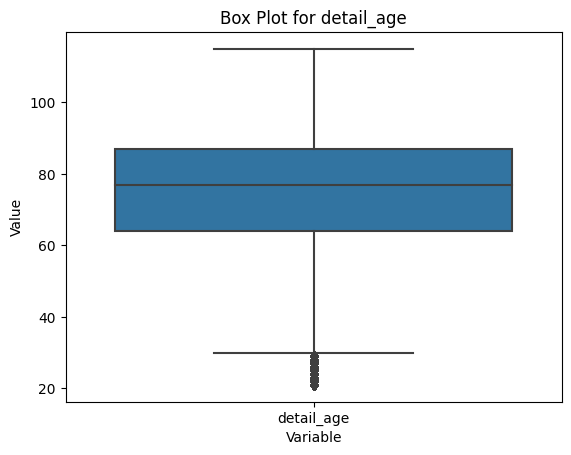

In [205]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['detail_age']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

In [80]:
# from sklearn.preprocessing import MinMaxScaler

In [171]:
# Calculate the minimum and maximum values
# min_val = np.min(sampled_df, axis=0)
# max_val = np.max(sampled_df, axis=0)

# Perform Min-Max normalization
# normalized_data = (sampled_df - min_val) / (max_val - min_val)

# print(normalized_data)

In [172]:
# Normalized Sample
# sns.boxplot(data=normalized_data[['manner_of_death', 'detail_age', 'race', 'day_of_week_of_death']])
# plt.xlabel('Variable')
# plt.ylabel('Value')
# plt.title("Box Plot for 'manner_of_death', 'detail_age', 'race', 'day_of_week_of_death'")
# plt.show()

In [173]:
# Normalized Sample
# sns.boxplot(data=normalized_data[['education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status']])
# plt.xlabel('Variable')
# plt.ylabel('Value')
# plt.title("'Box Plot for 'education_2003_revision', '113_cause_recode', '39_cause_recode', 'month_of_death', 'place_of_death_and_decedents_status'")
# plt.show()

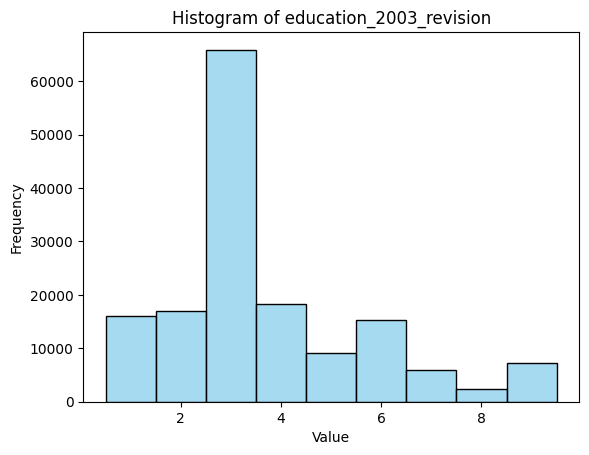

In [189]:
education_2003_revision  = sampled_df['education_2003_revision']
sns.histplot(education_2003_revision, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

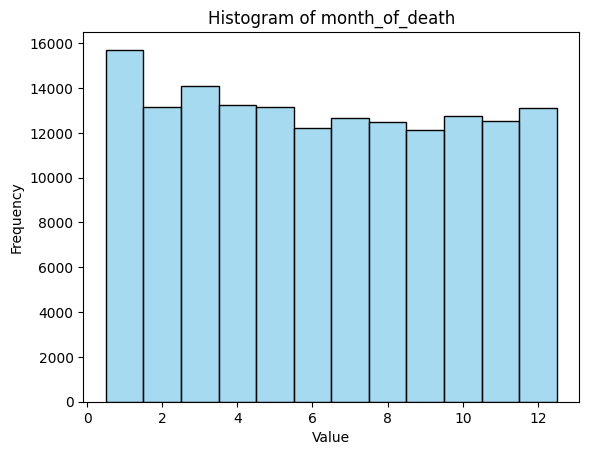

In [190]:
month_of_death = sampled_df['month_of_death']
sns.histplot(month_of_death, bins=12
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

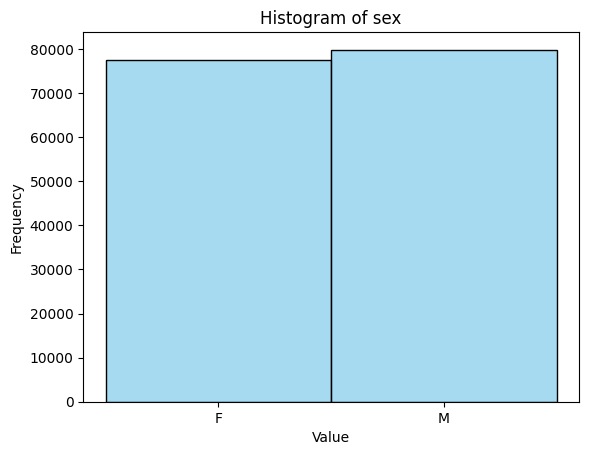

In [191]:
sex = sampled_df['sex']
sns.histplot(sex, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

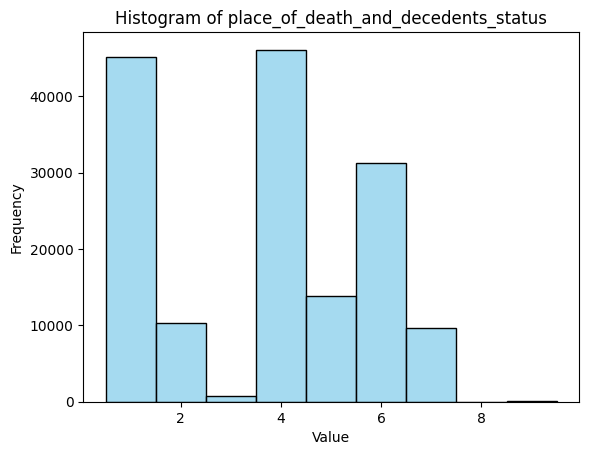

In [192]:
place_of_death_and_decedents_status = sampled_df['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

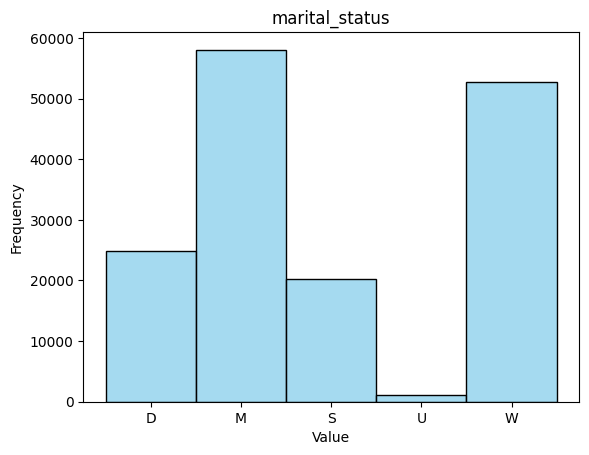

In [193]:
marital_status = sampled_df['marital_status']
sns.histplot(marital_status, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

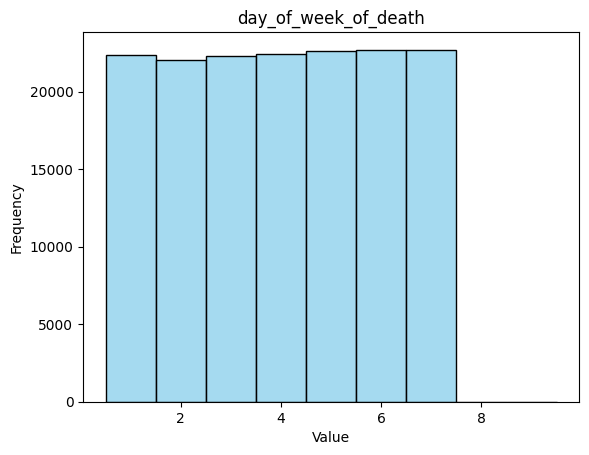

In [194]:
day_of_week_of_death = sampled_df['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

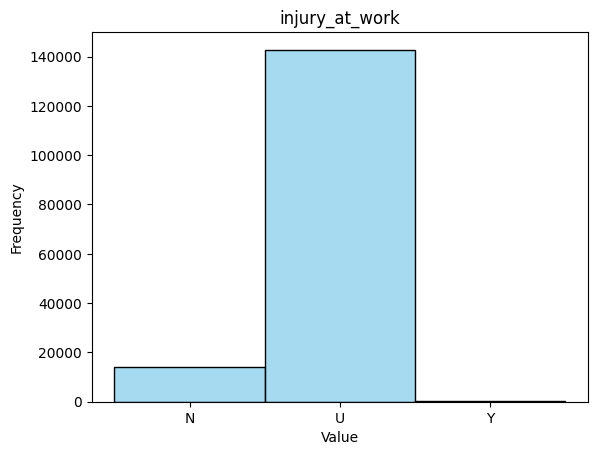

In [195]:
injury_at_work = sampled_df['injury_at_work']
sns.histplot(injury_at_work, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

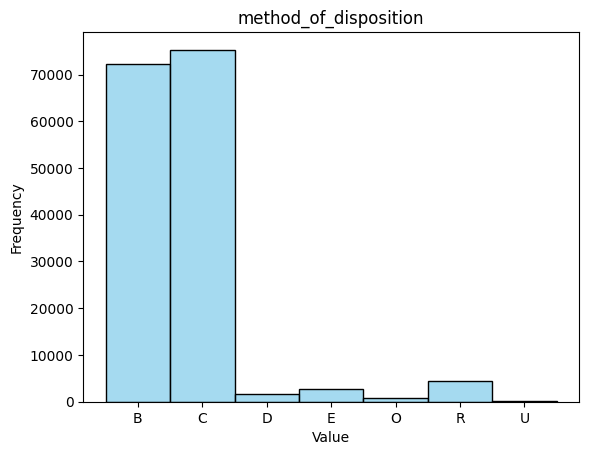

In [196]:
method_of_disposition = sampled_df['method_of_disposition']
sns.histplot(method_of_disposition, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

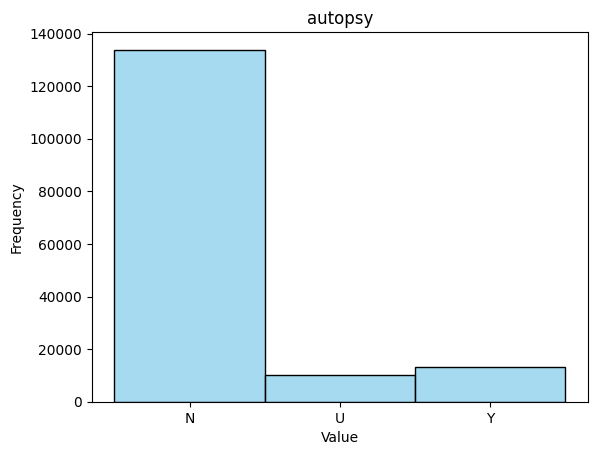

In [197]:
autopsy = sampled_df['autopsy']
sns.histplot(autopsy, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

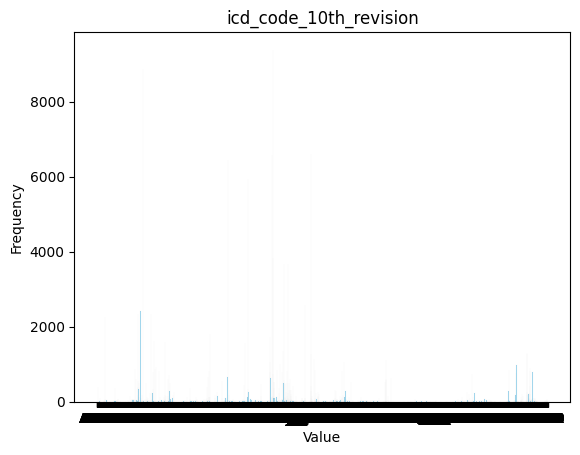

In [183]:
icd_code_10th_revision = sampled_df['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

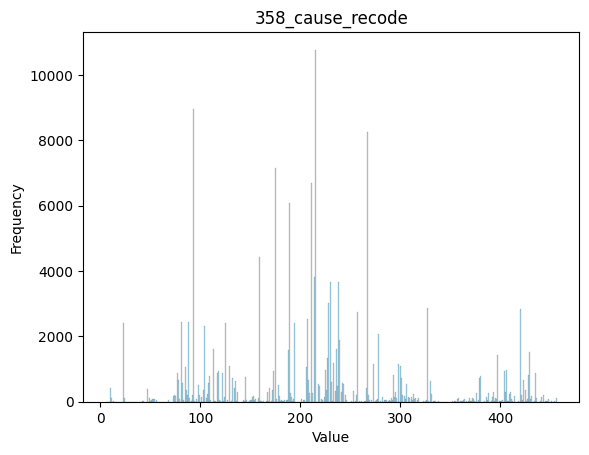

In [184]:
cause_recode358 = sampled_df['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

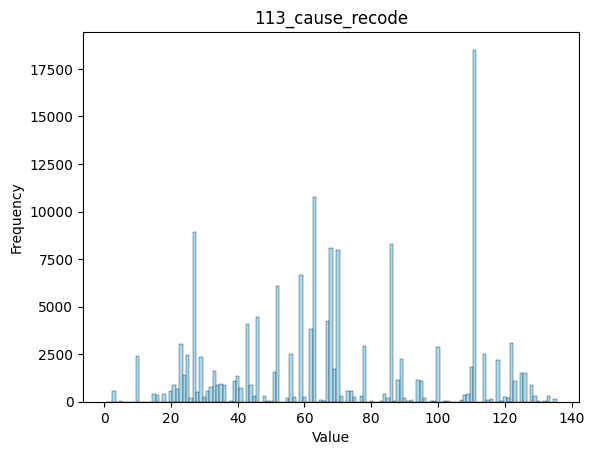

In [185]:
cause_recode113 = sampled_df['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

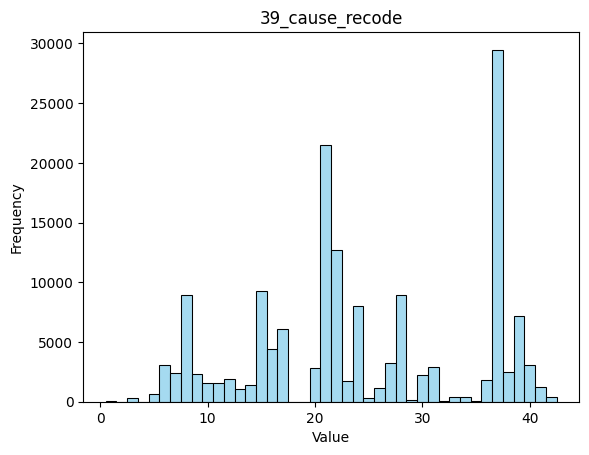

In [186]:
cause_recode39 = sampled_df['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

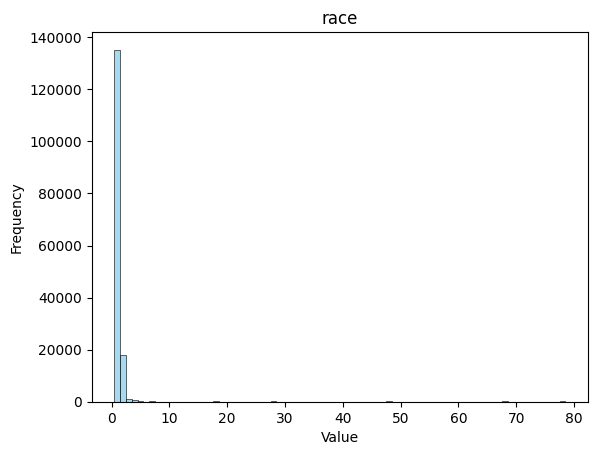

In [188]:
race = sampled_df['race']
sns.histplot(race, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

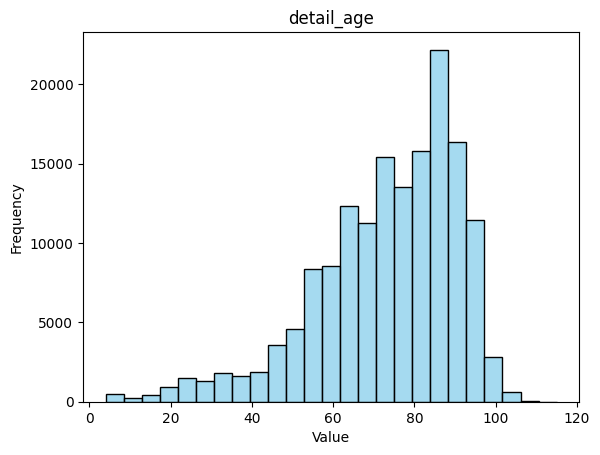

In [199]:
detail_age = sampled_df['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

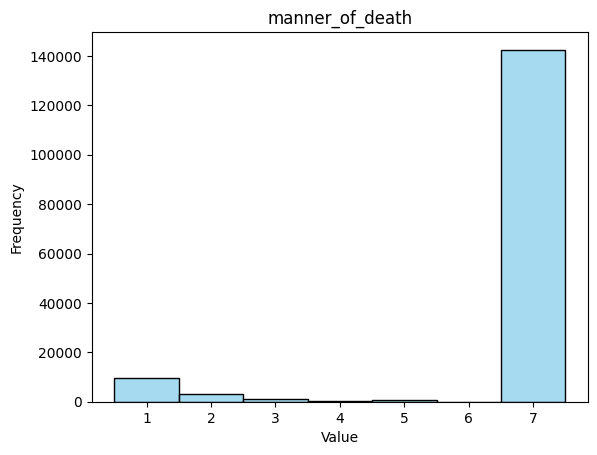

In [200]:
manner_of_death = sampled_df['manner_of_death']
sns.histplot(manner_of_death, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

In [206]:
# Correlation
numeric_columns = sampled_df.select_dtypes(include='number')
death_correlation_matrix = numeric_columns.corr()
print(death_correlation_matrix)

            detail_age
detail_age         1.0


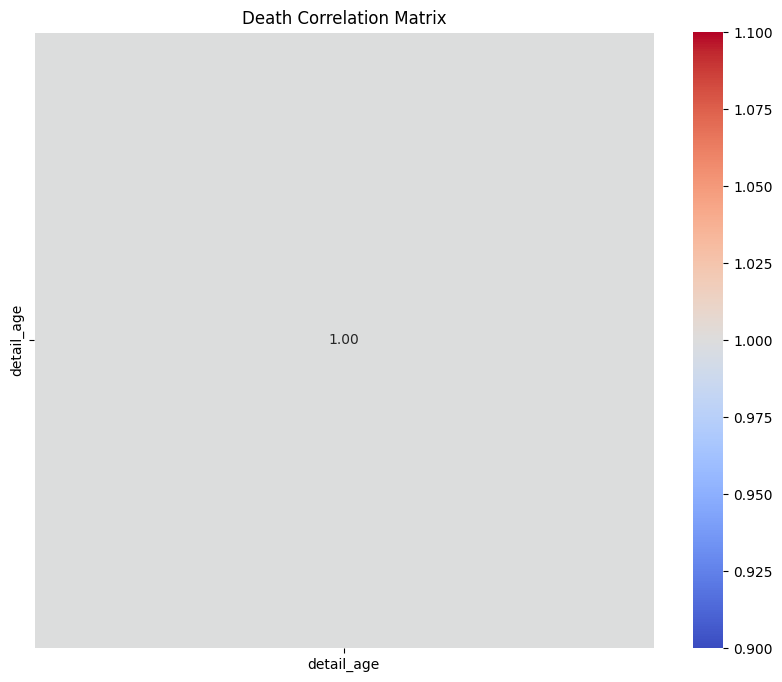

In [207]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Death Correlation Matrix')
plt.show()